## Degue vs Environmental Analysis.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check version
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'sklearn version: {sklearn.__version__}')

pandas version: 1.3.2
numpy version: 1.20.3
seaborn version: 0.11.2
sklearn version: 0.24.2


### Input Data from CSV file.

In [3]:
# Read in Data set
df= pd.read_csv('dengue_preprocessing.csv',header= 0,encoding= 'unicode_escape')

In [4]:
# Tempolary data preparation and just use for build model 

In [5]:
df = df.drop(columns=['province', 'year'])

In [6]:
df.describe()

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,3.000000,39.000000,122.929870,1543.319740,74.789351,39.460260,14.781299,27.875455,1.358442,0.090000,1404.485714
std,1.416054,22.255032,30.138271,774.967638,4.380409,2.236733,3.899928,1.024079,2.354370,0.126734,1363.167218
min,1.000000,1.000000,75.000000,513.200000,63.900000,24.000000,0.600000,23.600000,0.000000,0.000000,62.000000
25%,2.000000,20.000000,101.000000,1023.500000,71.400000,37.900000,11.600000,27.300000,0.000000,0.000000,510.000000
50%,3.000000,39.000000,114.000000,1308.700000,74.300000,39.700000,14.800000,27.900000,1.000000,0.040000,938.000000
75%,4.000000,58.000000,141.000000,1794.900000,77.700000,41.200000,18.200000,28.600000,2.000000,0.140000,1821.000000
max,5.000000,77.000000,220.000000,5287.300000,85.000000,43.400000,23.400000,31.300000,19.000000,0.880000,8279.000000


In [7]:
df.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [8]:
# Transformation
df_num  = df[['day_raindrop', 'quant_rain', 'humbidity_perc','temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]

In [9]:
# Choice of Numerical varialable.

#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Version1: select MinMax

num_column = df_num.dtypes[df_num.dtypes != 'object'].index

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

std_transform_feat = pd.DataFrame(data = df_num)
std_transform_feat[num_column] = scaler.fit_transform(df_num[num_column])

# Show an example of a record with scaling applied
display(std_transform_feat.tail())

,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc
380,0.248276,0.094531,0.218009,0.855670,0.535088,0.402597,0.000000,0.000000
381,0.172414,0.147588,0.270142,0.953608,0.504386,0.480519,0.052632,0.045455
382,0.075862,0.120002,0.170616,0.979381,0.587719,0.636364,0.052632,0.193182
383,0.117241,0.060870,0.355450,0.953608,0.649123,0.694805,0.000000,0.000000
384,0.248276,0.226619,0.218009,0.855670,0.596491,0.493506,0.157895,0.159091


In [11]:
# log transform to target variable impove RMSE value.

# df['patient'] = np.log(df['patient'])

In [12]:
df_cat = df[['year_num', 'province_num']]
y_tar = df[['patient']]

In [13]:
# Concat all numerical feature to DataFrame
df_pre = pd.concat((df_cat, std_transform_feat,y_tar),axis=1)

In [14]:
df_pre.describe().round(2)

,year_num,province_num,day_raindrop,quant_rain,humbidity_perc,temp_max,temp_min,temp_avg,dead,dead_perc,patient
count,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00,385.00
mean,3.00,39.00,0.33,0.22,0.52,0.80,0.62,0.56,0.07,0.10,1404.49
std,1.42,22.26,0.21,0.16,0.21,0.12,0.17,0.13,0.12,0.14,1363.17
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,62.00
25%,2.00,20.00,0.18,0.11,0.36,0.72,0.48,0.48,0.00,0.00,510.00
50%,3.00,39.00,0.27,0.17,0.49,0.81,0.62,0.56,0.05,0.05,938.00
75%,4.00,58.00,0.46,0.27,0.65,0.89,0.77,0.65,0.11,0.16,1821.00
max,5.00,77.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8279.00


# Building Linear Regression Model

1. Features selection for Linear Regression Model
2. Train Test Split
3. Creating and Training the Model
4. Model Evaluation


##  Features selection for Linear Regression Model

In [15]:
df_pre.columns

Index(['year_num', 'province_num', 'day_raindrop', 'quant_rain',
       'humbidity_perc', 'temp_max', 'temp_min', 'temp_avg', 'dead',
       'dead_perc', 'patient'],
      dtype='object')

In [16]:
X = df_pre[['temp_max', 'temp_min', 'temp_avg', 'dead', 'dead_perc']]
y = df_pre['patient']

# 'year_num', 'province_num', 'day_raindrop', 'quant_rain', 'humbidity_perc',

In [17]:
X = np.array(X)
#y = np.array(y)

## Repeated k-Fold Cross-Validation


The scikit-learn Python machine learning library provides an implementation of repeated k-fold cross-validation via the RepeatedKFold class.

The main parameters are the number of folds (n_splits), which is the “k” in k-fold cross-validation, and the number of repeats (n_repeats).

A good default for k is k=10.

A good default for the number of repeats depends on how noisy the estimate of model performance is on the dataset. A value of 3, 5, or 10 repeats is probably a good start. More repeats than 10 are probably not required.

In [18]:
from sklearn.model_selection import RepeatedKFold 

kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=0) 

for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
        
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

Train: [  0   2   3   4   8   9  11  12  13  14  16  17  18  19  21  22  23  24
  25  27  28  29  30  31  32  33  34  35  36  38  39  40  41  42  43  44
  46  47  48  49  50  51  53  56  57  58  61  62  63  66  67  69  70  71
  72  73  75  77  79  80  81  82  83  84  85  86  87  88  89  91  92  93
  94  95  96  97  98  99 101 103 104 105 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 123 124 125 126 127 128 129 130 131 133 135
 136 137 138 139 140 141 143 146 147 148 149 151 152 154 156 157 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 201 202 203 204 205 206 207 208 209 211 212 214 215 217 218 219 220
 221 222 223 225 226 227 228 230 232 233 234 236 238 240 241 242 243 244
 245 247 248 249 250 251 252 254 255 256 257 258 262 263 264 265 266 267
 268 269 270 272 273 274 276 277 278 279 280 284 285 287 288 289 290 291
 292 293 294 295 296 298 299 303 304 306 307

## Creating and Training the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
# Try to use simple model: Linear Regression.
lm = LinearRegression()

In [21]:
# Import libraries for tuning hyperparameter

from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [22]:
# Cross-Validation in sklearn

In [23]:
# fit the model
lm.fit(X_train, y_train)    

LinearRegression()

## Model Evaluation

evaluate model by visit coefficients of each item

In [24]:
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores

array([0.59139025, 0.31637191, 0.47261387, 0.31267738, 0.53527521])

In [25]:
# print the intercept
print(lm.intercept_)

96.18241783710573


## Predictions from our Model

In [26]:
# Predicting 
predictions = lm.predict(X_test)

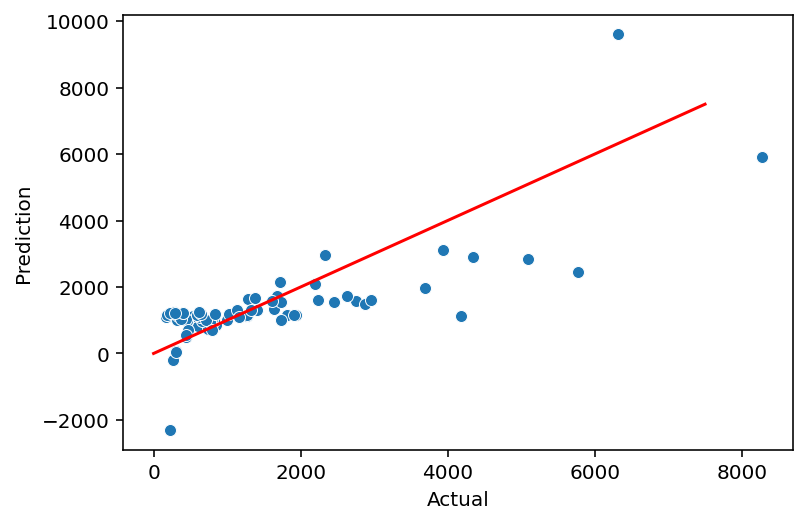

In [35]:
# plot predictions against actual

plot_k = sns.scatterplot(y_test,predictions)
plot_k.set(xlabel='Actual', ylabel='Prediction')
# generate and graph y = x line
x_plot = np.linspace(0,7500,10000)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')
plt.show()

# Simulate linear line

## Prediction

### Actual value and the predicted value

In [28]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': predictions})
mlr_diff.head(20)

,Actual value,Predicted value
0,1714,2148.578687
7,2333,2970.403387
9,601,832.523339
11,572,1157.739894
13,5089,2838.378649
19,802,1086.918543
30,1942,1150.044220
47,264,-187.626392
48,3930,3109.374098
54,3687,1975.959900


**Residual Histogram**

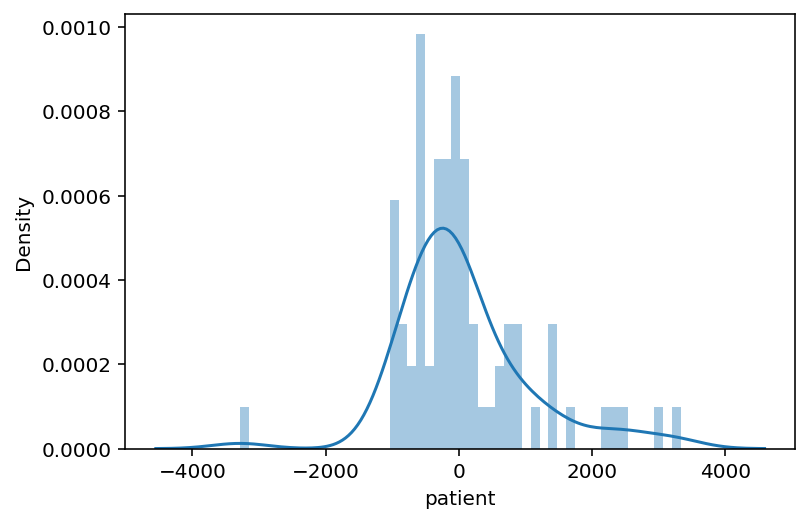

In [38]:
sns.distplot((y_test-predictions),bins=50)
plt.show()

## Regression Evaluation Metrics


Evaluation metrics for regression problems as below:

**Coefficient of determination(R2 score)** is used to evaluate the performance of a linear regression model. 
It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

$$R2= 1- SSres  /  SStot$$

**Mean Absolute Error** (MAE): the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE): the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE): the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Comparison:**

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


In [31]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print('R squared of Training Set: {:.2f}'.format(lm.score(X_train,y_train)))
print('R squared of Test Set: {:.2f}'.format(lm.score(X_test,y_test)))
print('Mean Absolute Error (MAE): {:.4f}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

R squared of Training Set: 0.55
R squared of Test Set: 0.57
Mean Absolute Error (MAE): 676.5037
Root Mean Squared Error (RMSE): 998.2440
